# MSDS 432 - Programming Assignment #1 Dan Avni

## Executive Summary

The purpose of this programming assignment is to illustrate the importance of choosing the right algorithm as data volumes grow. It is based on the notion of Big O() analysis that considers the worst case scenario either for run-time or memory usage of certain algorithms proportional to the size of the input.

in this case, we're looking into the runtime of two search algorithms, a linear search which simply scans the input serially, and a binary search, which given a sorted data, makes a guess looking at the data at the midpoint of the sorted data. If the midpoint has a value lower than the searched item the algorithm will search the higher half of the data. Each iteration cuts down the data by a factor of half. 

The binary search algorithm provides a runtime complexity of O(log(n)) while the linear algorithm provides a runtime complexity of O(n). In practical terms, the use of a binary search can turn a problem feasible, while linear search can be infeasible. To illustrate, searching a database of 1B records using binary search can take a worst case runtime of log (1B), which using base 2 translates to around 30 iterations. While linear search can exhaust the entire 1B iterations.

We also note that in order to implement binary search, the data has to be pre-sorted, making the investment worthwhile if multiple searches are expected, a fair assumption where building a system.

The results shown below deomnstrate that binary search performance is well behaved and grows slowly with the data volume, while linear search begins to exhibit poor performance, indicating that binary search, or optmized algorithms in general, are essential when designing system that must deal with larger data volumes.

## Method and Conclusions

In order to demonstrate the runtime performance of the sort, linear, and binary search algorithms we create random data sets of integers with increasing length. We execute the sort algorithm from the NumPy package and measure the runtime by time a clock measurement before and after the method call. 

We use the same approach with the linear and binary search. In order the ensure that we measure the Big O applicable worst-case scenario, we are searching for the largest integer in the data, thus, ensuring that the linear scan will have to traverse the entire data, and that the binary search will exhaust all search steps, as the mid-point value of each iteration will fail to find the largest item. 

The below chart illustrates how the binary search scales well with the data growth. We would expect a slight logarithmic upward trend, however, given the CPU power of modern computers, with this modestly sized data the performance appears flat with the data size. For the linear search, however, we see as expected, a linear increase in runtime. We attempted to increase the data size to get a better representation of binary search logarithmic increase, however, the runtime is so low that measurment is subject to random noise of other tasks occupying the CPU. we note that a fair comparison should examine the linear search runtime versus the sort + binary search, as the linear search algorithm does not require the data to be pre-sorted.  

Given the result, we can reinforce the conclusion that data structures and algorithms play a critical role in system design when dealing with any non-trivial data. The wrong choice can lead to impractical system that fails to scale with the data growth.

<img src="./runtime.png">

## Implementation

In [11]:
#import required packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

In [12]:
# binary search implemntation retrieved from https://github.com/egonSchiele/grokking_algorithms.git
def binary_search(list, item):
  # low and high keep track of which part of the list you'll search in.
  low = 0
  high = len(list) - 1

  # While you haven't narrowed it down to one element ...
  while low <= high:
    # ... check the middle element
    mid = (low + high) // 2
    guess = list[mid]
    # Found the item.
    if guess == item:
      return mid
    # The guess was too high.
    if guess > item:
      high = mid - 1
    # The guess was too low.
    else:
      low = mid + 1

  # Item doesn't exist
  return None

In [13]:
# plain linear search implementation 
def linear_search(list, item):
  pos  = 0
  end = len(list) - 1

  # While you haven't narrowed it down to one element ...
  while pos <= end:
    current = list[pos]
    # Found the item.
    if current == item:
      return pos
    else:
      pos = pos + 1

  # Item doesn't exist
  return None

In [14]:
#unit test validation of binary and linear search implementation
my_list = [1, 3, 5, 7, 9]
print(binary_search(my_list, 3)) # => 1
print(linear_search(my_list, 3)) # => 1

# 'None' means nil in Python. We use to indicate that the item wasn't found.
print(binary_search(my_list, 6)) # => None
print(linear_search(my_list, 6)) # => None

1
1
None
None


In [15]:
#utility function to generate and array of uniformly distributed integers with persistent seed across calls 
def generate_random_array(low, high, item_count):
    np.random.seed(666)
    return np.random.randint(low, high, item_count)

In [16]:
#prepare an array of all the desired data lengths
test_data_len_list  = [512, 1024, 2048, 4096, 8192, 16384, 32768, 65536]
#prepare an empty data frame with the desired column names
test_data_col_names = ['length', 'sort_ms', 'linear_search_ms', 'binary_search_ms', 'sort_linear_ms', 'sort_binary_ms']
test_data           = pd.DataFrame(columns = test_data_col_names) 
#iterate over the possible lens, create test data for each length, and compture runtime length in milliseconds
for test_data_len in test_data_len_list:    
    data   = generate_random_array(1, 10000, test_data_len)
    
    start  = time.time()
    data   = np.sort(data)
    sort_ms = (time.time() - start) * 1000
    
    item   = data[len(data) - 1] 
    
    start  = time.time()
    linear_search(data, item)
    linear_search_ms = (time.time() - start) * 1000
    
    start  = time.time()
    binary_search(data, item)
    binary_search_ms = (time.time() - start) * 1000
    
    #insert the results into a new dataframe record 
    test_data.loc[len(test_data)] = [
        test_data_len, 
        sort_ms, 
        linear_search_ms, 
        binary_search_ms, 
        sort_ms + linear_search_ms, 
        sort_ms + binary_search_ms ]

Below is a tabular representation of the test data. It is useful as the charts fail to show the minute fluctuations in the binary search performance. To get a true read of the binary search performance we will need to run multiple tests and average the results, as well as increase the size. We should also try to execute the code in a virtualized environment where the CPU is under competition from other processes.

In [17]:
#plain text data dump of the test results
test_data

,length,sort_ms,linear_search_ms,binary_search_ms,sort_linear_ms,sort_binary_ms
0,512.0,0.054121,0.675678,0.021219,0.729799,0.075340
1,1024.0,0.094175,0.877619,0.020266,0.971794,0.114441
2,2048.0,0.273705,1.999855,0.010967,2.273560,0.284672
3,4096.0,0.261068,3.675699,0.033379,3.936768,0.294447
4,8192.0,0.417471,1.792192,0.011206,2.209663,0.428677
5,16384.0,0.818014,4.850626,0.011444,5.668640,0.829458
6,32768.0,5.224705,7.728577,0.017643,12.953281,5.242348
7,65536.0,3.440142,15.375853,0.010252,18.815994,3.450394


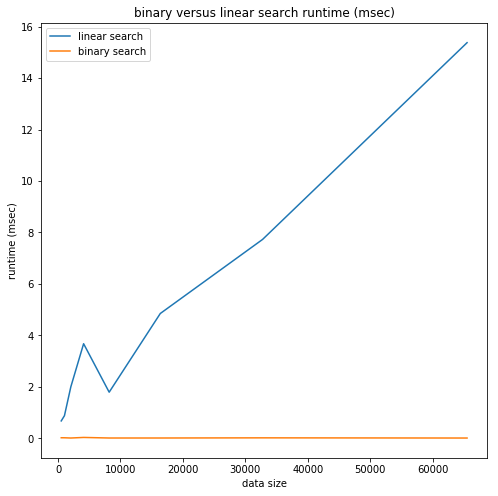

In [18]:
#plot the binary and linear search results against the data length
plt.figure(figsize=(8,8))
plt.plot(test_data.length, test_data.linear_search_ms, 
         label = 'linear search')
plt.plot(test_data.length, test_data.binary_search_ms, 
         label = 'binary search')
plt.legend()
plt.xlabel('data size')
plt.ylabel('runtime (msec)')
plt.title('binary versus linear search runtime (msec)')
plt.show()

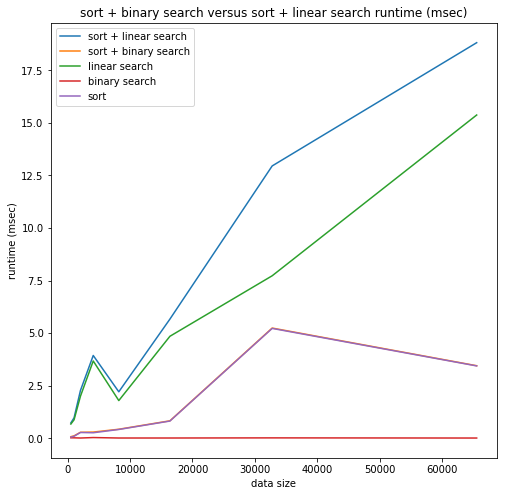

In [21]:
#plot the binary and linear search results against the data length, along with the combined sort and search time
plt.figure(figsize=(8,8))
plt.plot(test_data.length, test_data.sort_linear_ms,   label = 'sort + linear search')
plt.plot(test_data.length, test_data.sort_binary_ms,   label = 'sort + binary search')
plt.plot(test_data.length, test_data.linear_search_ms, label = 'linear search')
plt.plot(test_data.length, test_data.binary_search_ms, label = 'binary search')
plt.plot(test_data.length, test_data.sort_ms,          label = 'sort')
plt.legend(loc=2)
plt.xlabel('data size')
plt.ylabel('runtime (msec)')
plt.title('sort + binary search versus sort + linear search runtime (msec)')
plt.show()